# 4 Fitting Circles

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = np.load("circles.npy")
X_coord = data.T[0]
Y_coord = data.T[1]

(0, 1)

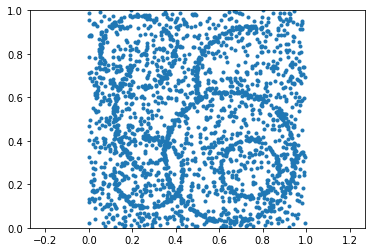

In [11]:
plt.scatter(X_coord,Y_coord, marker = ".")
plt.axis('equal')
plt.ylim((0,1))
plt.xlim((0,1))

By just counting the obvious ones we would fit 6 circles.